# OntoGen workflow demo based on Python Script Modules for LBD Text Mining Analysis

OntoGen is a semi-automatic text mining tool designed to help users generate topic ontologies by grouping documents into related clusters. Using the k-means clustering technique, it only requires users to set the k parameter to determine the number of clusters. OntoGen boasts a user-friendly interface, visualizing the ontology with concepts represented by their top three keywords. Users can manually edit these keywords and also get a quick overview of the concept hierarchy, which can be directly manipulated.

In [1]:
import import_ipynb
import LBD_01_data_acquisition
import LBD_02_data_preprocessing
import LBD_03_feature_extraction
import LBD_04_text_mining
import LBD_05_results_analysis
import LBD_06_visualization

importing Jupyter notebook from LBD_01_data_acquisition.ipynb
importing Jupyter notebook from LBD_02_data_preprocessing.ipynb


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bojan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bojan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


importing Jupyter notebook from LBD_03_feature_extraction.ipynb
importing Jupyter notebook from LBD_04_text_mining.ipynb
importing Jupyter notebook from LBD_05_results_analysis.ipynb
importing Jupyter notebook from LBD_06_visualization.ipynb


Import python libraries.

In [2]:
import nltk
import numpy as np
import itertools
import pandas as pd
import spacy
from typing import List, Dict
from collections import defaultdict


Define domain name and load text from file.

In [3]:
domainName = 'Migraine-Magnesium'
fileName = 'input/Magnesium_Migraine_before1988.txt'
lines = LBD_01_data_acquisition.load_data_from_file(fileName)
lines[:7]

['1Mag: !Mag Characterization of Clostridium thermocellum JW20.\n',
 '2Mag: !Mag Organochlorine and heavy metal contamination in the eggs of the Spanish Imperial Eagle (Aquila (heliaca) adalberti) and accompanying changes in eggshell morphology and chemistry.\n',
 '3Mag: !Mag A molecular orbital study of a model of the Mg2+ coordination complex of the self splicing reaction of ribosomal RNA.\n',
 '4Mag: !Mag Distribution and diagenesis of microfossils from the lower Proterozoic Duck Creek Dolomite, Western Australia.\n',
 '5Mag: !Mag Microfossils from oolites and pisolites of the Upper Proterozoic Eleonore Bay Group, Central East Greenland.\n',
 '6Mag: !Mag Carbonates and sulfates in CI chondrites:  formation by aqueous activity on the parent body.\n',
 '7Mag: !Mag The influence of prebiotic-type organic molecules on the crystallization of Al and Mg hydroxides.\n']

In [ ]:

domainName = 'Plato dialogues'
fileName = 'input/plato_dialogues_ontogen.txt'
lines = LBD_01_data_acquisition.load_data_from_file(fileName)
lines[:7]

Preprocess documents into a dictionary and extract documents as strings in a list.

In [4]:
docs_dict = LBD_02_data_preprocessing.construct_dict_from_list(lines)

keep_list = []
remove_list = ['migraine', 'magnesium']
mesh_word_list = []
prep_docs_dict = LBD_02_data_preprocessing.preprocess_docs_dict(
    docs_dict, keep_list = keep_list, remove_list = remove_list, mesh_word_list = mesh_word_list, \
    cleaning = True, remove_stopwords = True, lemmatization = True, \
    min_word_length = 3, keep_only_nouns = False, keep_only_mesh = False, stemming = False, stem_type = None)

ids_list = LBD_02_data_preprocessing.extract_ids_list(prep_docs_dict)
prep_docs_list = LBD_02_data_preprocessing.extract_preprocessed_documents_list(prep_docs_dict)

Display the first dictionary items, document (pubmed) ids and preprocessed documents.

In [5]:
dict(itertools.islice(prep_docs_dict.items(), 7))

{'1Mag': {'domain': 'Mag',
  'document': 'Characterization of Clostridium thermocellum JW20.',
  'preprocessed': 'characterization clostridium thermocellum jw20'},
 '2Mag': {'domain': 'Mag',
  'document': 'Organochlorine and heavy metal contamination in the eggs of the Spanish Imperial Eagle (Aquila (heliaca) adalberti) and accompanying changes in eggshell morphology and chemistry.',
  'preprocessed': 'organochlorine heavy metal contamination egg spanish imperial eagle aquila heliaca adalberti accompany change eggshell morphology chemistry'},
 '3Mag': {'domain': 'Mag',
  'document': 'A molecular orbital study of a model of the Mg2+ coordination complex of the self splicing reaction of ribosomal RNA.',
  'preprocessed': 'molecular orbital study model mg2 coordination complex self splice reaction ribosomal rna'},
 '4Mag': {'domain': 'Mag',
  'document': 'Distribution and diagenesis of microfossils from the lower Proterozoic Duck Creek Dolomite, Western Australia.',
  'preprocessed': 'dis

In [6]:
ids_list[:7]

['1Mag', '2Mag', '3Mag', '4Mag', '5Mag', '6Mag', '7Mag']

In [7]:
prep_docs_list[:7]

['characterization clostridium thermocellum jw20',
 'organochlorine heavy metal contamination egg spanish imperial eagle aquila heliaca adalberti accompany change eggshell morphology chemistry',
 'molecular orbital study model mg2 coordination complex self splice reaction ribosomal rna',
 'distribution diagenesis microfossils lower proterozoic duck creek dolomite western australia',
 'microfossils oolites pisolites upper proterozoic eleonore bay group central east greenland',
 'carbonate sulfate chondrites formation aqueous activity parent body',
 'influence prebiotictype organic molecules crystallization hydroxides']

Generate bag-of-words matrix from the list of preprocessed documents. Remove ngram words that occur less than *min_ngram_count* times (3 in our case) in the whole corpus of documents.

In [8]:
ngram_size = 2
min_df = 1

# BOW representation
word_list, bow_matrix = LBD_03_feature_extraction.create_bag_of_words(prep_docs_list, ngram_size, min_df)
print('Number of terms in initial vocabulary with all ngrams: ', len(word_list))
# print(word_list)
# print(bow_matrix)

# remove nterms with frequency count less than min_count_ngram from vocabulary word_list and bow_matrix
min_count_ngram = 3
tmp_sum_count_docs_containing_word = LBD_03_feature_extraction.sum_count_documents_containing_each_word(word_list, bow_matrix)

tmp_sum_count_word_in_docs = LBD_03_feature_extraction.sum_count_each_word_in_all_documents(word_list, bow_matrix)

tmp_filter_columns = []
for i, word in enumerate(word_list):
    if not LBD_03_feature_extraction.word_is_nterm(word):
        tmp_filter_columns.append(i)
    else:
        if tmp_sum_count_word_in_docs[word] >= min_count_ngram:
            check_ngram = word.split()
            passed = True
            if check_ngram[0] == check_ngram[1]:
                passed = False
            # passed = True
            if passed:
                tmp_filter_columns.append(i)

tmp_filter_rows = []
for i, id in enumerate(ids_list):
    tmp_filter_rows.append(i)

tmp_filtered_word_list, tmp_filtered_bow_matrix = LBD_03_feature_extraction.filter_matrix_columns(
    word_list, bow_matrix, tmp_filter_rows, tmp_filter_columns)

word_list = tmp_filtered_word_list
bow_matrix = tmp_filtered_bow_matrix
print('Number of terms in preprocessed vocabulary after removing infrequent ngrams: ', len(word_list))

LBD_02_data_preprocessing.save_list_to_file(word_list, "output/_list.txt")
LBD_02_data_preprocessing.save_list_to_file(prep_docs_list, "output/_prep_list.txt")


Number of terms in initial vocabulary with all ngrams:  84252
Number of terms in preprocessed vocabulary after removing infrequent ngrams:  19881


Compute margins for bag-of-word matrix. Prepare also the dictionaries of words and documents sorted according to the sum of word count in BOW matrix (*bow_matrix*).

In [9]:
sum_count_docs_containing_word = LBD_03_feature_extraction.sum_count_documents_containing_each_word(word_list, bow_matrix)

sum_count_word_in_docs = LBD_03_feature_extraction.sum_count_each_word_in_all_documents(word_list, bow_matrix)

sum_count_words_in_doc = LBD_03_feature_extraction.sum_count_all_words_in_each_document(ids_list, bow_matrix)

print('Number of documents in which each word is present: ', dict(itertools.islice(sum_count_docs_containing_word.items(), 7)))
print('Number of occurences of each word in all documents: ', dict(itertools.islice(sum_count_word_in_docs.items(), 7)))
print('Number of words in each document: ', dict(itertools.islice(sum_count_words_in_doc.items(), 7)))

# Compute the order of rows (documents) and columns (words) in the bow matrix so that the most frequent words are in the top-left corner. 
filter_columns = LBD_02_data_preprocessing.get_index_list_of_dict1_keys(
    LBD_02_data_preprocessing.sort_dict_by_value(sum_count_word_in_docs, reverse=True), word_list)
filter_rows = LBD_02_data_preprocessing.get_index_list_of_dict1_keys(
    LBD_02_data_preprocessing.sort_dict_by_value(sum_count_words_in_doc, reverse=True), ids_list) 

# Rearange (filter) the bow matrix according to the previously computed order.
filtered_ids_list, filtered_word_list, filtered_bow_matrix = LBD_03_feature_extraction.filter_matrix(
    ids_list, word_list, bow_matrix, filter_rows, filter_columns)
print('The first few documents in the rows of the filtered bow matrix: ', filtered_ids_list[:7])
print('The first few words in the columns of the filtered bow matrix: ', filtered_word_list[:7])

Number of documents in which each word is present:  {'000dalton': 1, '1030nm': 1, '10formyltetrahydrofolate': 1, '10year': 1, '10yearold': 1, '110kd': 2, '110orthophenanthroline': 1}
Number of occurences of each word in all documents:  {'000dalton': 1, '1030nm': 1, '10formyltetrahydrofolate': 1, '10year': 1, '10yearold': 1, '110kd': 2, '110orthophenanthroline': 1}
Number of words in each document:  {'1Mag': 4, '2Mag': 17, '3Mag': 14, '4Mag': 11, '5Mag': 12, '6Mag': 8, '7Mag': 6}
The first few documents in the rows of the filtered bow matrix:  ['1632Mag', '8316Mag', '3569Mag', '8112Mag', '586Mag', '1559Mag', '829Mag']
The first few words in the columns of the filtered bow matrix:  ['effect', 'calcium', 'study', 'rat', 'headache', 'treatment', 'patients']


Visualize bag-of-words matrix.

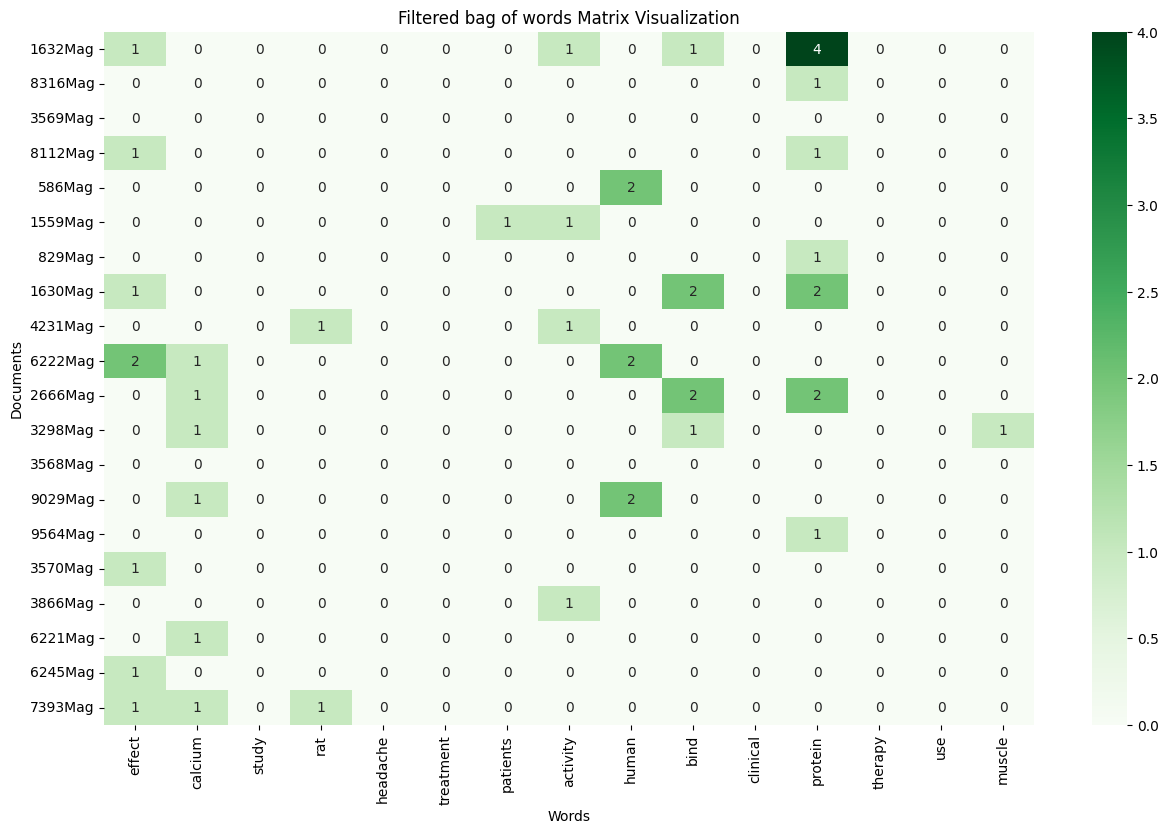

In [10]:
first_row = 0
last_row = 20
first_column = 0
last_column = 15
LBD_06_visualization.plot_bow_tfidf_matrix('Filtered bag of words', \
                                           filtered_bow_matrix[first_row:last_row,first_column:last_column], \
                                           filtered_ids_list[first_row:last_row], \
                                           filtered_word_list[first_column:last_column], as_int = True)

Generate tf-idf matrix from the list of preprocessed documents.

In [11]:
# TF-IDF representation
word_list, tfidf_matrix = LBD_03_feature_extraction.create_tfidf(prep_docs_list, ngram_size, min_df)
print('Number of terms in initial vocabulary with all n-grams: ', len(word_list))
# print(word_list)
# print(tfidf_matrix)

# Rearange (filter) the tfidf matrix according to the previously computed order from bow matrix.
tmp_filtered_word_list, tmp_filtered_tfidf_matrix = LBD_03_feature_extraction.filter_matrix_columns(
    word_list, tfidf_matrix, tmp_filter_rows, tmp_filter_columns)

word_list = tmp_filtered_word_list
tfidf_matrix = tmp_filtered_tfidf_matrix
print('Number of terms in preprocessed vocabulary after removing infrequent n-grams: ', len(word_list))

Number of terms in initial vocabulary with all n-grams:  84252
Number of terms in preprocessed vocabulary after removing infrequent n-grams:  19881


Compute margins for tf-idf matrix.

In [12]:
sum_word_tfidf = LBD_03_feature_extraction.sum_count_each_word_in_all_documents(word_list, tfidf_matrix)
max_word_tfidf = LBD_03_feature_extraction.max_tfidf_each_word_in_all_documents(word_list, tfidf_matrix)

sum_doc_tfidf = LBD_03_feature_extraction.sum_count_all_words_in_each_document(ids_list, tfidf_matrix)
max_doc_tfidf = LBD_03_feature_extraction.max_tfidf_all_words_in_each_document(ids_list, tfidf_matrix)

print('Sum of tfidf for each word: ', dict(itertools.islice(sum_word_tfidf.items(), 7)))
print('Max of tfidf for each word: ', dict(itertools.islice(max_word_tfidf.items(), 7)))

print('Sum of tfidf for each document: ', dict(itertools.islice(sum_doc_tfidf.items(), 7)))
print('Max of tfidf for each document: ', dict(itertools.islice(max_doc_tfidf.items(), 7)))

# Compute the order of rows (documents) and columns (words) in the tfidf matrix so that the most important words are in the top-left corner. 
filter_columns = LBD_02_data_preprocessing.get_index_list_of_dict1_keys(
    LBD_02_data_preprocessing.sort_dict_by_value(max_word_tfidf, reverse=True), word_list)
filter_rows = LBD_02_data_preprocessing.get_index_list_of_dict1_keys(
    LBD_02_data_preprocessing.sort_dict_by_value(max_doc_tfidf, reverse=True), ids_list) 

# Rearange (filter) the bow matrix according to the previously computed order.
filtered_ids_list, filtered_word_list, filtered_tfidf_matrix = LBD_03_feature_extraction.filter_matrix(
    ids_list, word_list, tfidf_matrix, filter_rows, filter_columns)

Sum of tfidf for each word:  {'000dalton': 0.2875642859811597, '1030nm': 0.29732048324574617, '10formyltetrahydrofolate': 0.2917784036297402, '10year': 0.2193185241794571, '10yearold': 0.3189339542434567, '110kd': 0.6042663559502319, '110orthophenanthroline': 0.30630396777983443}
Max of tfidf for each word:  {'000dalton': 0.2875642859811597, '1030nm': 0.29732048324574617, '10formyltetrahydrofolate': 0.2917784036297402, '10year': 0.2193185241794571, '10yearold': 0.3189339542434567, '110kd': 0.3136394006905495, '110orthophenanthroline': 0.30630396777983443}
Sum of tfidf for each document:  {'1Mag': 1.35564284779459, '2Mag': 2.795533910358828, '3Mag': 2.4708658761800804, '4Mag': 2.3767064908365207, '5Mag': 2.472905676409118, '6Mag': 1.7106872321499502, '7Mag': 1.6118934242047969}
Max of tfidf for each document:  {'1Mag': 0.41256409704135194, '2Mag': 0.19371904525538317, '3Mag': 0.22903282988550303, '4Mag': 0.24489364399721167, '5Mag': 0.23339848031697397, '6Mag': 0.2960935238406028, '7Mag

Visualize tf-idf matrix.

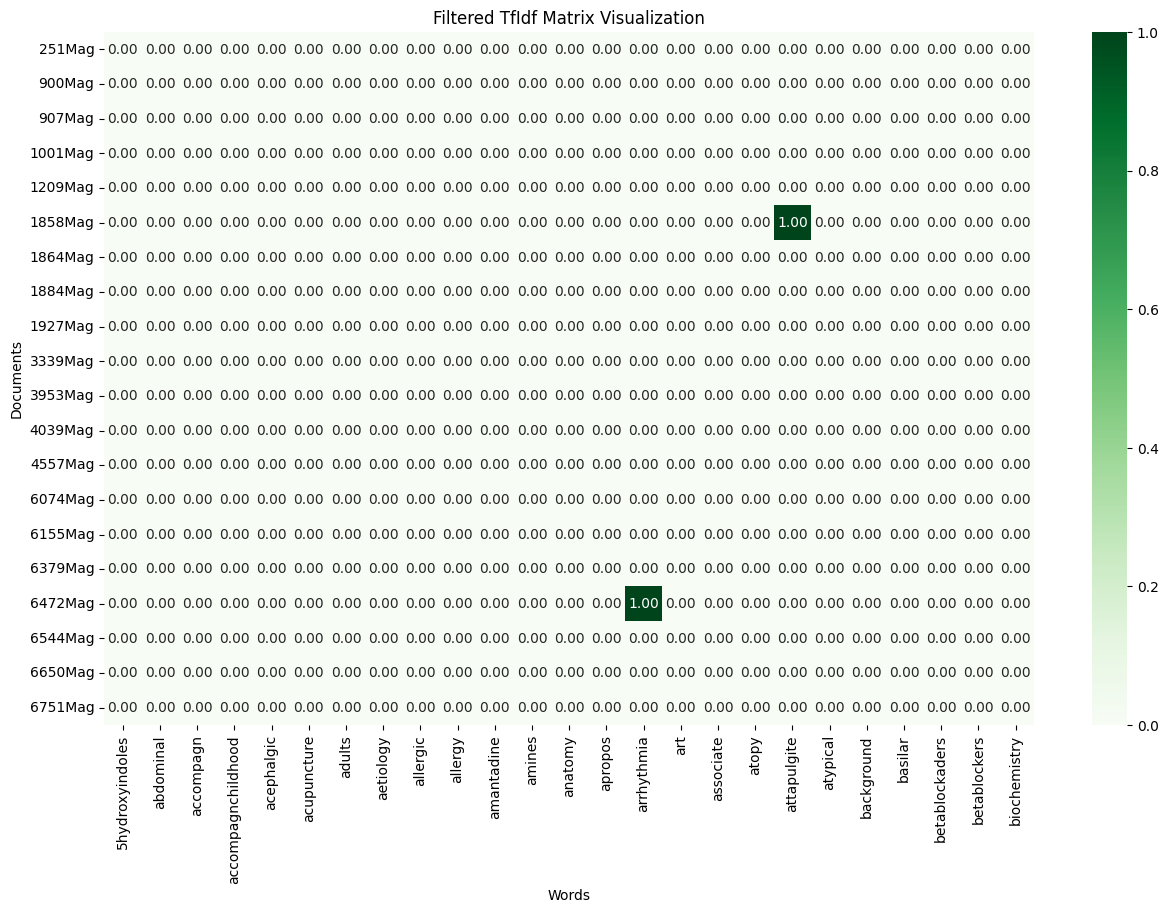

In [13]:
first_row = 0
last_row = 20
first_column = 0
last_column = 25
LBD_06_visualization.plot_bow_tfidf_matrix('Filtered TfIdf', filtered_tfidf_matrix[first_row:last_row,first_column:last_column], \
                                           filtered_ids_list[first_row:last_row], filtered_word_list[first_column:last_column], as_int = False)

Generate a list of the domain names of all the documents and a list of unique domain names.

In [14]:
domains_list = LBD_02_data_preprocessing.extract_domain_names_list(docs_dict)
print('Domain names for the first few documents: ', domains_list[:7])
unique_domains_list = LBD_02_data_preprocessing.extract_unique_domain_names_list(prep_docs_dict)
print('A list of all uniques domain names in all the documents: ', unique_domains_list)
for unique_domain in unique_domains_list:
    print('Number of documents in ', unique_domain, ': ', domains_list.count(unique_domain), sep='')


Domain names for the first few documents:  ['Mag', 'Mag', 'Mag', 'Mag', 'Mag', 'Mag', 'Mag']
A list of all uniques domain names in all the documents:  ['Mag', 'Mig']
Number of documents in Mag: 10000
Number of documents in Mig: 6156


Visualize the documents in 2D graph by reducing the dimensionality of tfidf matrix with PCA.

In [15]:
LBD_06_visualization.visualize_tfidf_pca_interactive(ids_list, domains_list, tfidf_matrix, transpose = False)

In [16]:
from sklearn.cluster import KMeans

# Cluster the documents using KMeans
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(tfidf_matrix)
cluster_assignments = list(np.asarray(kmeans.labels_))
cluster_assignments = [str(i) for i in cluster_assignments]
# print(cluster_assignments[:50])
# print(len(cluster_assignments), cluster_assignments.count('0'), cluster_assignments.count('1'))

unique_cluster_assignments = list(set(cluster_assignments))
print('A list of all uniques domain names in all the documents: ', unique_cluster_assignments)
for unique_cluster in unique_cluster_assignments:
    print('Number of documents in ', unique_cluster, ': ', cluster_assignments.count(unique_cluster), sep='')


c:\Work\bc3\venv\lib\site-packages\sklearn\utils\validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



A list of all uniques domain names in all the documents:  ['0', '1']
Number of documents in 0: 1040
Number of documents in 1: 15116


In [17]:
LBD_06_visualization.visualize_tfidf_pca_interactive(ids_list, cluster_assignments, tfidf_matrix, transpose = False)

In [18]:
def create_crosstab(list1, list2):
    # Check if the two lists have the same length
    if len(list1) != len(list2):
        raise ValueError("The two lists must have the same length.")

    # Initialize the crosstab dictionary
    crosstab = defaultdict(lambda: defaultdict(int))

    # Populate the crosstab with frequency counts
    for val1, val2 in zip(list1, list2):
        crosstab[val1][val2] += 1

    # Display the crosstab as a matrix
    headers = sorted(crosstab.keys())
    sub_headers = sorted({val for sublist in crosstab.values() for val in sublist.keys()})

    print("\t" + "\t".join(map(str, sub_headers)))
    for h in headers:
        row = [str(crosstab[h][sh]) for sh in sub_headers]
        print(f"{h}\t" + "\t".join(row))

create_crosstab(domains_list, cluster_assignments)


	0	1
Mag	1025	8975
Mig	15	6141
